# Appendix B

# AMATH 563 Homework 1 

### Alexey Sholokhov

## Section 0: importing useful modules

In [2]:
%pylab inline
import mnist
from sklearn.linear_model import Lasso, Ridge, LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, accuracy_score
from matplotlib import colors

Populating the interactive namespace from numpy and matplotlib


## Section 1: reading and preprocessing data

In [3]:
train_data = mnist.train_images()
train_labels = mnist.train_labels()
test_data = mnist.test_images()
test_labels = mnist.test_labels()

In [4]:
N = train_data.shape[0]
n = test_data.shape[0]

In [5]:
X_train = np.zeros((N, train_data.shape[1]*train_data.shape[2]))
Y_train = np.zeros((N, 10))
X_test = np.zeros((n, test_data.shape[1]*test_data.shape[2]))
Y_test = np.zeros((n, 10))
for j in range(N):
    X_train[j, :] = train_data[j, :, :].reshape(train_data.shape[1]*train_data.shape[2])
    label = np.zeros(10)
    label[train_labels[j]] = 1
    Y_train[j, :] = label

for j in range(n):
    X_test[j, :] = test_data[j, :, :].reshape(test_data.shape[1]*test_data.shape[2])
    label = np.zeros(10)
    label[test_labels[j]] = 1
    Y_test[j, :] = label

## Section 2: determining the mapping from the image space to the label space

### 1) Pseudoinverse

In [153]:
W = pinv(X_train).dot(Y_train)
print(mean(W != 0))

0.9821428571428571


In [33]:
print("Train: \n", classification_report(train_labels, [argmax(y) for y in X_train.dot(W)]))
print("Test: \n", classification_report(test_labels, [argmax(y) for y in X_test.dot(W)]))

Train: 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      5923
           1       0.82      0.97      0.89      6742
           2       0.90      0.81      0.85      5958
           3       0.82      0.85      0.84      6131
           4       0.85      0.88      0.86      5842
           5       0.87      0.70      0.78      5421
           6       0.89      0.93      0.91      5918
           7       0.87      0.86      0.87      6265
           8       0.80      0.74      0.77      5851
           9       0.80      0.80      0.80      5949

   micro avg       0.85      0.85      0.85     60000
   macro avg       0.85      0.85      0.85     60000
weighted avg       0.85      0.85      0.85     60000

Test: 
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       980
           1       0.83      0.98      0.90      1135
           2       0.91      0.78      0.84      1032
       

### 2) Linear Regression

In [154]:
least_squares = LinearRegression()
least_squares.fit(X_train, Y_train)
print("Train: \n", classification_report(train_labels, [argmax(y) for y in least_squares.predict(X_train)]))
print("Test: \n", classification_report(test_labels, [argmax(y) for y in least_squares.predict(X_test)]))
print(mean(least_squares.coef_ != 0))

Train: 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      5923
           1       0.82      0.97      0.89      6742
           2       0.91      0.80      0.85      5958
           3       0.84      0.84      0.84      6131
           4       0.84      0.89      0.86      5842
           5       0.87      0.74      0.80      5421
           6       0.89      0.93      0.91      5918
           7       0.87      0.87      0.87      6265
           8       0.84      0.75      0.80      5851
           9       0.81      0.80      0.81      5949

   micro avg       0.86      0.86      0.86     60000
   macro avg       0.86      0.85      0.86     60000
weighted avg       0.86      0.86      0.86     60000

Test: 
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       980
           1       0.83      0.98      0.90      1135
           2       0.92      0.79      0.85      1032
       

### 3) Lasso

In [158]:
lasso = Lasso(alpha=0.4)
lasso.fit(X_train, Y_train)
print("Train: \n", classification_report(train_labels, [argmax(y) for y in lasso.predict(X_train)]))
print("Test: \n", classification_report(test_labels, [argmax(y) for y in lasso.predict(X_test)]))
print(mean(lasso.coef_ != 0))

Train: 
               precision    recall  f1-score   support

           0       0.88      0.95      0.92      5923
           1       0.79      0.97      0.87      6742
           2       0.90      0.79      0.84      5958
           3       0.80      0.83      0.81      6131
           4       0.83      0.89      0.86      5842
           5       0.88      0.67      0.76      5421
           6       0.88      0.92      0.90      5918
           7       0.84      0.87      0.86      6265
           8       0.84      0.73      0.78      5851
           9       0.82      0.77      0.79      5949

   micro avg       0.84      0.84      0.84     60000
   macro avg       0.85      0.84      0.84     60000
weighted avg       0.84      0.84      0.84     60000

Test: 
               precision    recall  f1-score   support

           0       0.89      0.96      0.93       980
           1       0.80      0.97      0.88      1135
           2       0.91      0.78      0.84      1032
       

### 4) Ridge

In [157]:
ridge = Ridge()
ridge.fit(X_train, Y_train)
print("Train: \n", classification_report(train_labels, [argmax(y) for y in ridge.predict(X_train)]))
print("Test: \n", classification_report(test_labels, [argmax(y) for y in ridge.predict(X_test)]))
print(mean(ridge.coef_ != 0))

Train: 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      5923
           1       0.82      0.97      0.89      6742
           2       0.91      0.80      0.85      5958
           3       0.84      0.84      0.84      6131
           4       0.84      0.89      0.86      5842
           5       0.87      0.74      0.80      5421
           6       0.89      0.93      0.91      5918
           7       0.87      0.87      0.87      6265
           8       0.84      0.75      0.80      5851
           9       0.81      0.80      0.81      5949

   micro avg       0.86      0.86      0.86     60000
   macro avg       0.86      0.86      0.86     60000
weighted avg       0.86      0.86      0.86     60000

Test: 
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       980
           1       0.84      0.98      0.90      1135
           2       0.92      0.79      0.85      1032
       

## Section 3: Feature selection via sparsity promotion

In [90]:
from tqdm import tqdm
import pickle

In [93]:
k = 100
lasso_models = []
try:
    lasso_file = open("lasso_models.dump", 'rb')
    lasso_models = pickle.load(lasso_file)
    print("Loaded from the dump")
except:
    for a in tqdm(linspace(0.01, 10, k)):
        lasso = Lasso(alpha=a)
        lasso.fit(X_train, Y_train)
        lasso_models.append(lasso)
    pickle.dump(lasso_models, open("lasso_models.dump", 'wb'))
    print("Calculated, saved to the disk")

Loaded from the dump


In [94]:
coefs = zeros((10, 784, k))
for i, model in enumerate(lasso_models):
    coefs[:, :, i] = model.coef_

In [95]:
important_pixels = zeros((k, 784))
f1_test_scores = zeros(k)
accuracy_scores = zeros(k)
sparsity = zeros(k)
for i, model in enumerate(lasso_models):
    sparsity[i] = mean(model.coef_ != 0)
    answers = [argmax(y) for y in model.predict(X_test)]
    f1_test_scores[i] = f1_score(test_labels, answers, average='macro')
    accuracy_scores[i] = accuracy_score(test_labels, answers)
    coefs = model.coef_
    for j in range(coefs.shape[1]):
        important_pixels[i, j] = max(abs(coefs[:, j])) > 0

/Users/aksholokhov/.anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/aksholokhov/.anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/aksholokhov/.anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/aksholokhov/.anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Use

In [96]:
cmap1 = colors.ListedColormap(['white', 'blue', 'red'])
cmap2 = colors.ListedColormap(['blue', 'red'])
k = 100
lambdas = linspace(0.01, 10, k)

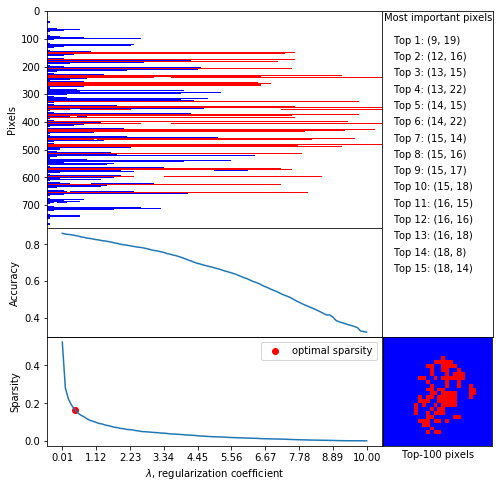

In [97]:
fig = figure(figsize=(8, 8))
grid = plt.GridSpec(4, 4, wspace=0, hspace=0)
pixels = fig.add_subplot(grid[:2, :3])
sparsity_plot = fig.add_subplot(grid[3, :3])
accuracy = fig.add_subplot(grid[2, :3])
top_pixels = fig.add_subplot(grid[:3, 3])
top_pixels_img = fig.add_subplot(grid[3, 3])
sparsity_plot.plot(lambdas, sparsity)
opt_pt = 4
sparsity_plot.scatter(lambdas[opt_pt], sparsity[opt_pt], c='r', label="optimal sparsity")
sparsity_plot.set_ylabel("Sparsity")
sparsity_plot.legend()
accuracy.plot(lambdas, accuracy_scores)
accuracy.set_ylabel("Accuracy")
pixels.set_ylabel("Pixels")
pixels.set_xticks([])
accuracy.set_xticks([])
sparsity_plot.set_xticks(linspace(lambdas[0], lambdas[-1], 10))
sparsity_plot.set_xlabel(r"$\lambda$, regularization coefficient")
last_importance = zeros(784)
for i in range(100):
    for j in range(784):
        if important_pixels[i, j] == 1:
            last_importance[j] = i 
            
important_list = sorted(enumerate(last_importance), key = lambda x: x[1], reverse=True)[:100]
important_pixels_img = zeros((28, 28))

for i, _ in important_list:
    for j in range(k):
        if important_pixels[j, i] == 1:
            important_pixels[j, i] = 2
            
pixels.imshow(important_pixels.T, aspect='auto', cmap=cmap1)

top_pixels.text(0.02, 0.97, "Most important pixels")
#top_pixels.set_xlabel("Most important pixels")
for i, pixel in enumerate([(i//28+1, i%28+1) for i, _ in important_list]):
    if i < 15:
        top_pixels.text(0.1, 0.90 - 0.05*i, "Top %d: (%d, %d)"%(i+1, *pixel))
    important_pixels_img[pixel] = 1
    
top_pixels_img.imshow(important_pixels_img, cmap=cmap2 )

top_pixels.set_xticks([])
top_pixels.set_yticks([])
top_pixels_img.set_xticks([])
top_pixels_img.set_yticks([])
top_pixels_img.set_xlabel("Top-100 pixels")

savefig(open("report/images/important_pixels.pdf", 'wb'), format="pdf")

## Section 4: Establishing sets of important pixels for individual classifiers

In [17]:
p = 20
coefs_individual = zeros((10, 784, p))
ind_sparsity = zeros((10, p))
ind_accuracy = zeros((10, p))
ind_coefficients = zeros((10, 784, p))

for j, a in tqdm(enumerate(linspace(0.01, 2, p))):
    for i in range(10):
        lasso = Lasso(alpha=a)
        lasso.fit(X_train, Y_train[:, i])
        ind_sparsity[i, j] = mean(lasso.coef_ != 0)
        ind_accuracy[i, j] = accuracy_score(Y_test[:, i], lasso.predict(X_test) > 0.5)
        ind_coefficients[i, :, j] = lasso.coef_




0it [00:00, ?it/s]


1it [02:20, 140.01s/it]


2it [03:25, 102.94s/it]


3it [04:24, 88.14s/it] 


4it [05:24, 81.24s/it]


5it [06:20, 76.03s/it]


6it [07:15, 72.50s/it]


7it [08:05, 69.40s/it]


8it [08:52, 66.51s/it]


9it [09:39, 64.44s/it]


10it [10:25, 62.56s/it]


11it [11:09, 60.89s/it]


12it [11:50, 59.17s/it]


13it [12:30, 57.74s/it]


14it [13:11, 56.51s/it]


15it [13:50, 55.39s/it]


16it [14:29, 54.35s/it]


17it [15:07, 53.39s/it]


18it [15:44, 52.49s/it]


19it [16:19, 51.58s/it]


20it [16:56, 50.84s/it]




In [ ]:

try:
    coefs_file = open("coefs_individuals.dump", 'rb')
    coefs_individual = pickle.load(coefs_file)
    print("Loaded from the dump")
except:
    for j, a in tqdm(enumerate(linspace(0.01, 2, p))):
        for i in range(10):
            lasso = Lasso(alpha=a)
            lasso.fit(X_train, Y_train[:, i])
            coefs_individual[i, :, j] = lasso.coef_
    pickle.dump(coefs_individual, open("coefs_individuals.dump", 'wb'))
    print("Calculated, saved to the disk")

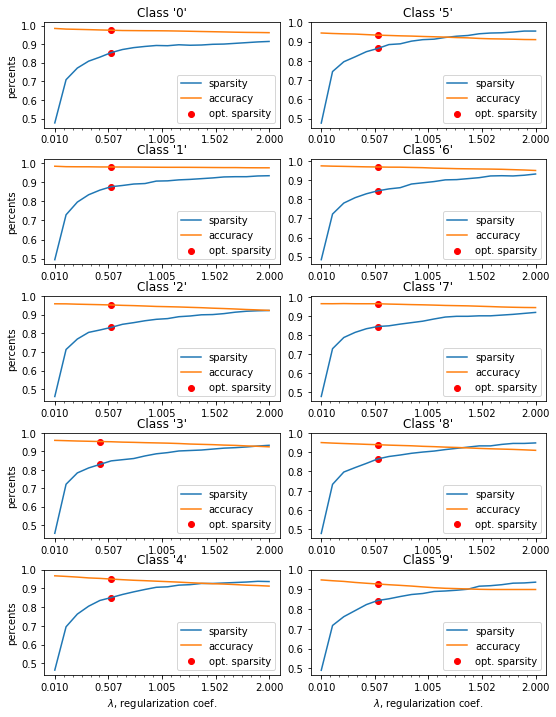

In [59]:
aspect = 3
fig = figure(figsize=(3*aspect, 4*aspect))
grid = plt.GridSpec(5, 4, wspace=0.3, hspace=0.3)
lambdas = linspace(0.01, 2, p)

optimals = [5, 5, 5, 4, 5, 5, 5, 5, 5, 5]

for i, opt in zip(range(10), optimals):
    
    img = fig.add_subplot(grid[i%5, 2*(i//5):2*(i//5)+2])
    img.plot(lambdas, 1-ind_sparsity[i, :], label="sparsity")
    img.plot(lambdas, ind_accuracy[i, :], label="accuracy")
    img.scatter(lambdas[opt], 1-ind_sparsity[i, opt], c='r', label="opt. sparsity")
    img.scatter(lambdas[opt], ind_accuracy[i, opt], c='r')
    img.set_title("Class '%d'"%i)
    img.set_yticks(linspace(0.5, 1, 6))
    img.set_xticks(linspace(0.01, 2, 25), minor=True)
    img.set_xticks(linspace(0.01, 2, 5))
    img.legend()
    if i//5 == 0:
        img.set_ylabel("percents")
    if i%5 == 4:
        img.set_xlabel(r'$\lambda$, regularization coef.')
savefig(open("report/images/classifiers_ind_sparsity.eps", 'wb'), format="eps")
show()

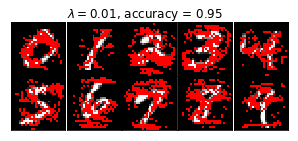

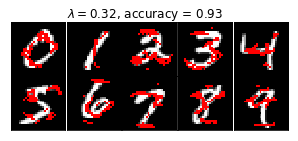

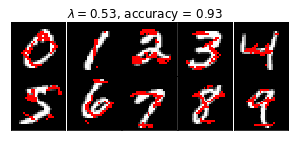

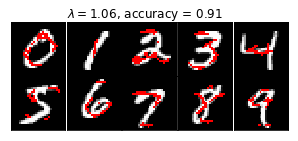

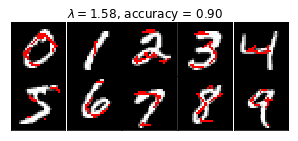

In [44]:
for k, lam in enumerate([0, 3, 5, 10, 15]):
    fig = figure(figsize=(5, 2))
    grid = plt.GridSpec(2, 5, wspace=0, hspace=0)
    cmap = colors.ListedColormap(['red'])
    for i in range(10):
        pixels = array(ind_coefficients[i, :, lam] > 0).reshape((28, 28))
        background = train_data[train_labels == i][0]
        img = fig.add_subplot(grid[i//5, i%5])
        img.imshow(background, cmap='gray')
        pixels = np.ma.masked_where(pixels == 0, pixels)
        img.imshow(pixels, cmap=cmap)
        img.set_xticks([])
        img.set_yticks([])
    fig.suptitle(r"$\lambda = %.2f$, accuracy = %.2f"%(lambdas[lam], ind_accuracy[i, lam]))
    savefig(open("report/images/pixels_with_background_%d.pdf"%k, 'wb'), format="pdf")
    show()